In [1]:
from pylab import *
%matplotlib inline

import data
import numpy as np


/home/alex/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
patient_ids = data.luna16_get_patient_ids()
pid = patient_ids[0]
image = data.luna16_get_image(pid)

In [3]:
image.shape 

(231, 360, 360)

In [4]:
import sklearn.neighbors

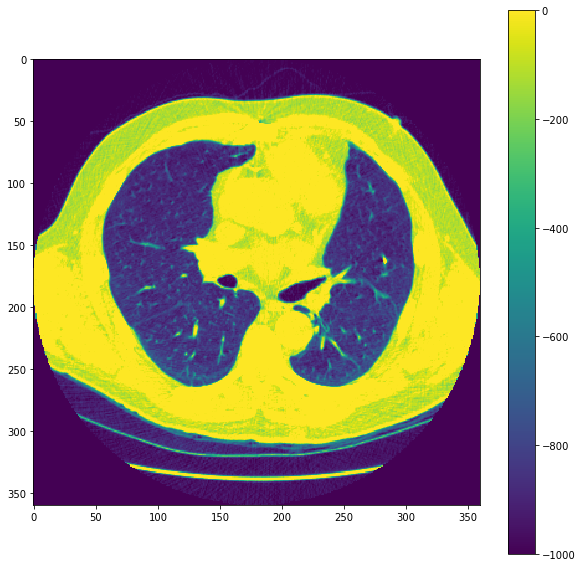

In [64]:
figure(figsize=(10,10))
imshow(image[110], vmin=-1000, vmax=0)
colorbar()

In [40]:
patches = []
borders = []

def get_border(p, w):
    border = np.concatenate((p[:w,:].ravel(), p[-w:,:].ravel(), p[w:-w,:w].ravel(), p[w:-w,-w:].ravel()))
    #border = np.concatenate((p[:w,:].ravel(), p[w:,:w].ravel()))
    return border

for i in range(0,360-16,2):
    for j in range(0,360-16,2):
        p = image[115,i:i+16,j:j+16]
        #print(p.shape)
        border = get_border(p, 4)
        #print(border.shape)
        patches.append(p)
        borders.append(border)

In [41]:
borders = np.asarray(borders, dtype=np.float32)

In [16]:
import scipy.spatial

In [42]:
kdt = scipy.spatial.cKDTree(borders)

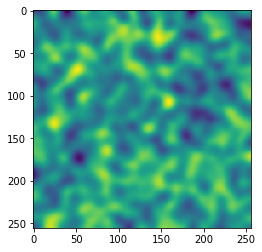

In [57]:
import scipy.ndimage.filters
noise_image = np.random.normal(size=(256,256))*300 - 800
noise_image = scipy.ndimage.filters.gaussian_filter(noise_image, sigma=6)
imshow(noise_image)

In [19]:
import random

In [78]:
output_image = image[100].copy() # np.zeros((256,256))

for i in range(0,output_image.shape[0]-16,12):
    for j in range(0,output_image.shape[1]-16,12):
        p = output_image[i:i+16,j:j+16]
        #p = output_image[i:i+16,j:j+16]
        distances, indices = kdt.query([get_border(p, 4)], k=2)
        output_image[i:i+16,j:j+16] = patches[random.choice(indices[0])]

In [31]:
indices

array([[13312, 13140, 13313, 13264]])

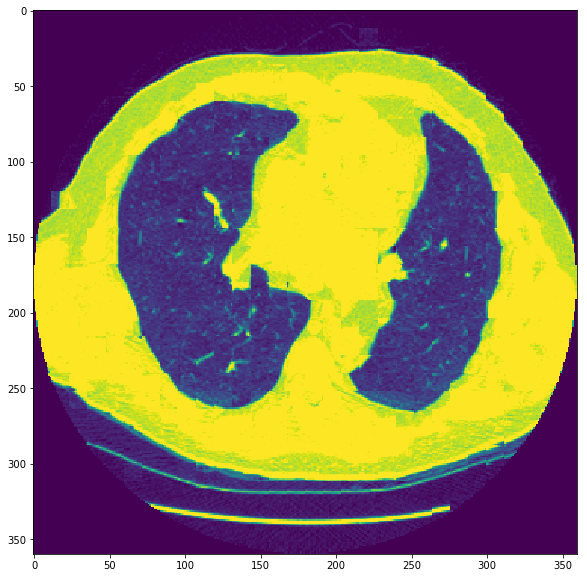

In [79]:
figure(figsize=(10,10))
imshow(output_image, vmin=-1000, vmax=0)

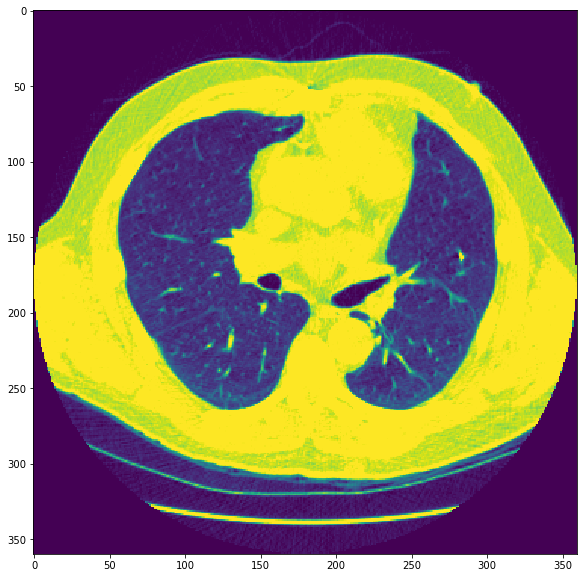

In [70]:
figure(figsize=(10,10))
imshow(image[110], vmin=-1000, vmax=0)